In [64]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:

# 윈저사이저 적용
df1 = pd.read_csv('./dataset/MDA_sampling_ENN.csv',encoding='CP949')
df2 = pd.read_csv('./label지정.csv', encoding='cp949')

for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.01)

df1.columns

Index(['[제조]자기자본구성비율', '[제조]순운전자본회전률', '[제조]비유동자산회전률', '[제조]총자본증가율',
       '[제조]유동비율', '[제조]비유동자산증가율', '[제조]1주당매출액', '[제조]총자본순이익률', '[제조]부가가치율',
       'year', 'label'],
      dtype='object')

In [66]:
df2 =df2.reset_index(drop="index")
df2.describe()

,거래소코드,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
count,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,1.066200e+04,10662.000000,...,1.066200e+04,10662.000000,10662.000000,10662.000000,10662.000000,10662.000000,1.066200e+04,10662.000000,10662.0,10662.000000
mean,92074.287188,4.993341,28.056523,84.564483,21.639397,13.746344,22.626214,17.352542,6.212778e+02,87.858023,...,1.485140e+06,10.562375,111.876595,-23.525442,-73.331389,14.732072,1.894793e+05,2015.869818,12.0,0.015757
std,106083.269592,0.354335,1454.454305,3093.493880,129.847723,51.742527,354.943960,82.628720,6.254670e+04,3275.800579,...,5.170670e+07,224.658324,1419.551265,1418.995549,2107.927519,102.169681,1.369595e+07,2.882518,0.0,0.124539
min,250.000000,4.000000,-100.000000,-100.000000,-99.470000,-95.840000,-1068.120000,-98.810000,-1.522079e+05,-99.970000,...,-2.657909e+09,-13958.620000,0.000000,-116701.060000,-190075.340000,0.000000,-4.493653e+06,2011.000000,12.0,0.000000
25%,39240.000000,5.000000,-9.657500,-5.257500,-4.167500,-3.217500,-1.920000,-8.830000,-3.159750e+01,-11.220000,...,7.957000e+01,12.020000,38.280000,2.385000,-0.297500,1.660000,-6.875000e-01,2013.000000,12.0,0.000000
50%,65950.000000,5.000000,4.300000,1.440000,4.485000,5.520000,5.870000,5.535000,0.000000e+00,0.000000,...,2.685100e+02,21.785000,57.065000,35.020000,10.985000,3.030000,2.470000e+00,2016.000000,12.0,0.000000
75%,105330.000000,5.000000,19.100000,17.970000,21.067500,17.827500,17.110000,23.542500,3.889500e+01,22.117500,...,1.303918e+03,34.447500,76.037500,52.097500,28.827500,6.407500,1.707750e+01,2018.000000,12.0,0.000000
max,950200.000000,6.000000,149805.530000,295498.650000,7919.440000,2579.670000,34640.710000,4274.050000,6.452079e+06,313488.540000,...,1.418999e+09,2377.220000,116801.060000,99.180000,3373.680000,6295.580000,1.000000e+09,2020.000000,12.0,1.000000


In [67]:
# train test set 분리
df1
df2 = df2[df2['year']>=2019] #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]자기자본구성비율', '[제조]순운전자본회전률', '[제조]비유동자산회전률', '[제조]총자본증가율','[제조]유동비율', '[제조]비유동자산증가율', '[제조]1주당매출액', '[제조]총자본순이익률', '[제조]부가가치율']]
X_test = df2[['[제조]자기자본구성비율', '[제조]순운전자본회전률', '[제조]비유동자산회전률', '[제조]총자본증가율','[제조]유동비율', '[제조]비유동자산증가율', '[제조]1주당매출액', '[제조]총자본순이익률', '[제조]부가가치율']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]자기자본구성비율,[제조]순운전자본회전률,[제조]비유동자산회전률,[제조]총자본증가율,[제조]유동비율,[제조]비유동자산증가율,[제조]1주당매출액,[제조]총자본순이익률,[제조]부가가치율
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,60.961566,0.928298,2.211087,15.547764,349.703261,27.811356,10626.025349,-1.956116,-6.161531
std,21.249294,0.569136,3.752962,68.692552,565.881923,197.025693,32484.082885,16.669830,401.283903
min,-101.660000,0.000000,0.000000,-77.380000,7.230000,-93.710000,0.000000,-159.830000,-13958.620000
25%,46.120000,0.550000,0.840000,-3.090000,113.175000,-4.185000,1605.230000,-5.600000,11.585000
50%,62.330000,0.870000,1.450000,5.720000,186.160000,5.370000,4703.340000,1.400000,22.620000
75%,78.270000,1.210000,2.510000,18.880000,361.535000,23.640000,10931.755000,5.955000,37.070000
max,98.970000,6.910000,87.100000,2579.670000,9437.540000,7919.440000,929526.040000,129.020000,2377.220000


In [68]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [69]:
from sklearn.model_selection import GridSearchCV


In [70]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [71]:
# # 디시전트리 하이퍼파라미터 구하기
# tree = DecisionTreeClassifier()

# # 딕셔너리로 전달
# # key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
# param_grid = {
#     'max_depth':[2,3,4,5,6,7,8], #7개
#     'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
# }
# grid_search = GridSearchCV(tree
#                           , param_grid = param_grid
#                           , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
#                           , n_jobs = -1)  #-1: 모든 코어 사용

# grid_search.fit(X_train, y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

In [72]:

#최적 하이퍼 파라미터 :{'max_depth': 3,'min_samples_leaf': 5}, 최적 평균 정확도 :0.984
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 8,min_samples_leaf=5)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [73]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [74]:
# # 하이퍼파라미터 Grid-Search
# from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,4,6,8],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4,6,8.10],
#                'min_samples_split': [4,6,8,10],
#                'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 3최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


In [75]:
# 랜덤 포레스트 최적 하이퍼 파라미터 적용
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 
# 'min_samples_split': 4, 'n_estimators': 40}, 최적 평균 정확도 :0.984
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'gini', max_features= 'auto',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=60)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [76]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# #로지스틱 회귀 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {'penalty': ['l2','l1','elasticnet','None'],
#           'C':[0.01,0.1,1,1,5,10]}

# grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train,y_train)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [78]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.983
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 1, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [80]:
# # knn 파라미터 구하기
# from sklearn.metrics import accuracy_score
# for k in range(1,11):
#     knn_clf = KNeighborsClassifier(n_neighbors=k)
#     knn_clf.fit(knn_X_train, y_train)
#     knn_pred = knn_clf.predict(knn_X_test)
#     knn_score=accuracy_score(y_test,knn_pred)
#     print(k)
#     print(knn_score)
    


In [81]:
# knn 최적의 파라미터 모델 6에서 제일 높음
knn_clf = KNeighborsClassifier(n_neighbors=10)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [82]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]자기자본구성비율', '[제조]순운전자본회전률', '[제조]비유동자산회전률', '[제조]총자본증가율','[제조]유동비율', '[제조]비유동자산증가율', '[제조]1주당매출액', '[제조]총자본순이익률', '[제조]부가가치율']]
X_train_XG.columns = [['자기자본구성비율', '순운전자본회전률', '비유동자산회전률', '총자본증가율','유동비율', '비유동자산증가율', '1주당매출액', '총자본순이익률', '부가가치율']]
X_test_XG = df2[['[제조]자기자본구성비율', '[제조]순운전자본회전률', '[제조]비유동자산회전률', '[제조]총자본증가율','[제조]유동비율', '[제조]비유동자산증가율', '[제조]1주당매출액', '[제조]총자본순이익률', '[제조]부가가치율']]
X_test_XG.columns =[['자기자본구성비율', '순운전자본회전률', '비유동자산회전률', '총자본증가율','유동비율', '비유동자산증가율', '1주당매출액', '총자본순이익률', '부가가치율']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[20:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [83]:
# #xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [84]:
# xgb부스트 최적의 파라미터
#최적 하이퍼 파라미어:{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 60}, 최적 평균 정확도:0.982
xgb_wrapper = XGBClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [85]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [86]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(i)
    print(pc_scores)


1
0.01168679392286716
2
0.01168679392286716
3
0.01168679392286716
4
0.01168679392286716
5
0.01168679392286716
6
0.01168679392286716
7
0.01168679392286716
8
0.011297234125438255
9
0.01168679392286716
10
0.01168679392286716


In [87]:

pc_clf = Perceptron(n_iter = 7)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [88]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2150  387]
 [  12   18]]
정확도: 0.8446, 정밀도 : 0.0444, 재현율:0.6000,F1 스코어:0.0828
ROC 스코어: 0.7237, PR score : 0.0313
None
디시전트리
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
None
디시전트리 최적의 모델
오차행렬
[[1262 1275]
 [   2   28]]
정확도: 0.5025, 정밀도 : 0.0215, 재현율:0.9333,F1 스코어:0.0420
ROC 스코어: 0.7154, PR score : 0.0208
None
랜덤포레스트
오차행렬
[[1518 1019]
 [   3   27]]
정확도: 0.6019, 정밀도 : 0.0258, 재현율:0.9000,F1 스코어:0.0502
ROC 스코어: 0.7492, PR score : 0.0244
None
랜덤포레스트 최적의 모델
오차행렬
[[1876  661]
 [   2   28]]
정확도: 0.7417, 정밀도 : 0.0406, 재현율:0.9333,F1 스코어:0.0779
ROC 스코어: 0.8364, PR score : 0.0387
None
로지스틱
오차행렬
[[2165  372]
 [  10   20]]
정확도: 0.8512, 정밀도 : 0.0510, 재현율:0.6667,F1 스코어:0.0948
ROC 스코어: 0.7600, PR score : 0.0379
None
로지스틱회귀 최적의 모델
오차행렬
[[2165  372]
 [  10   20]]
정확도: 0.8512, 정밀도 : 0.0510, 재현율:0.6667,F1 스코어:0.0948
ROC 스코어: 0.7600, PR score : 0.0379
None
Knn
오차행렬
[[1979  558]
 [   5   25]]
정확도: 0.7807, 정밀도 : 0.0429, 재현율:0.

In [89]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[1701  836]
 [   4   26]]
정확도: 0.6728, 정밀도 : 0.0302, 재현율:0.8667,F1 스코어:0.0583
ROC 스코어: 0.7686, PR score : 0.0277
임곗값: 0.2
오차행렬
[[1922  615]
 [   5   25]]
정확도: 0.7585, 정밀도 : 0.0391, 재현율:0.8333,F1 스코어:0.0746
ROC 스코어: 0.7955, PR score : 0.0345
임곗값: 0.3
오차행렬
[[2007  530]
 [   7   23]]
정확도: 0.7908, 정밀도 : 0.0416, 재현율:0.7667,F1 스코어:0.0789
ROC 스코어: 0.7789, PR score : 0.0346
임곗값: 0.4
오차행렬
[[2089  448]
 [  10   20]]
정확도: 0.8216, 정밀도 : 0.0427, 재현율:0.6667,F1 스코어:0.0803
ROC 스코어: 0.7450, PR score : 0.0324
임곗값: 0.5
오차행렬
[[2150  387]
 [  12   18]]
정확도: 0.8446, 정밀도 : 0.0444, 재현율:0.6000,F1 스코어:0.0828
ROC 스코어: 0.7237, PR score : 0.0313
임곗값: 0.6
오차행렬
[[2203  334]
 [  12   18]]
정확도: 0.8652, 정밀도 : 0.0511, 재현율:0.6000,F1 스코어:0.0942
ROC 스코어: 0.7342, PR score : 0.0354
임곗값: 0.7
오차행렬
[[2266  271]
 [  13   17]]
정확도: 0.8894, 정밀도 : 0.0590, 재현율:0.5667,F1 스코어:0.1069
ROC 스코어: 0.7299, PR score : 0.0385
임곗값: 0.8
오차행렬
[[2326  211]
 [  13   17]]
정확도: 0.9127, 정밀도 : 0.0746, 재현율:0.5667,F1 스코어:0.1318
ROC 스코어: 0.

In [90]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.2
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.3
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.4
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.5
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.6
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.7
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.7110, PR score : 0.0205
임곗값: 0.8
오차행렬
[[1240 1297]
 [   2   28]]
정확도: 0.4940, 정밀도 : 0.0211, 재현율:0.9333,F1 스코어:0.0413
ROC 스코어: 0.

In [91]:
# 디시전트리 최적

get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1202 1335]
 [   2   28]]
정확도: 0.4792, 정밀도 : 0.0205, 재현율:0.9333,F1 스코어:0.0402
ROC 스코어: 0.7036, PR score : 0.0200
임곗값: 0.2
오차행렬
[[1228 1309]
 [   2   28]]
정확도: 0.4893, 정밀도 : 0.0209, 재현율:0.9333,F1 스코어:0.0410
ROC 스코어: 0.7087, PR score : 0.0203
임곗값: 0.3
오차행렬
[[1232 1305]
 [   2   28]]
정확도: 0.4908, 정밀도 : 0.0210, 재현율:0.9333,F1 스코어:0.0411
ROC 스코어: 0.7095, PR score : 0.0204
임곗값: 0.4
오차행렬
[[1262 1275]
 [   2   28]]
정확도: 0.5025, 정밀도 : 0.0215, 재현율:0.9333,F1 스코어:0.0420
ROC 스코어: 0.7154, PR score : 0.0208
임곗값: 0.5
오차행렬
[[1262 1275]
 [   2   28]]
정확도: 0.5025, 정밀도 : 0.0215, 재현율:0.9333,F1 스코어:0.0420
ROC 스코어: 0.7154, PR score : 0.0208
임곗값: 0.6
오차행렬
[[1262 1275]
 [   2   28]]
정확도: 0.5025, 정밀도 : 0.0215, 재현율:0.9333,F1 스코어:0.0420
ROC 스코어: 0.7154, PR score : 0.0208
임곗값: 0.7
오차행렬
[[1262 1275]
 [   2   28]]
정확도: 0.5025, 정밀도 : 0.0215, 재현율:0.9333,F1 스코어:0.0420
ROC 스코어: 0.7154, PR score : 0.0208
임곗값: 0.8
오차행렬
[[1347 1190]
 [   2   28]]
정확도: 0.5356, 정밀도 : 0.0230, 재현율:0.9333,F1 스코어:0.0449
ROC 스코어: 0.

In [92]:
#로지스틱 회귀

get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1234 1303]
 [   2   28]]
정확도: 0.4916, 정밀도 : 0.0210, 재현율:0.9333,F1 스코어:0.0411
ROC 스코어: 0.7099, PR score : 0.0204
임곗값: 0.2
오차행렬
[[1704  833]
 [   5   25]]
정확도: 0.6735, 정밀도 : 0.0291, 재현율:0.8333,F1 스코어:0.0563
ROC 스코어: 0.7525, PR score : 0.0262
임곗값: 0.3
오차행렬
[[1959  578]
 [   7   23]]
정확도: 0.7721, 정밀도 : 0.0383, 재현율:0.7667,F1 스코어:0.0729
ROC 스코어: 0.7694, PR score : 0.0321
임곗값: 0.4
오차행렬
[[2075  462]
 [   7   23]]
정확도: 0.8173, 정밀도 : 0.0474, 재현율:0.7667,F1 스코어:0.0893
ROC 스코어: 0.7923, PR score : 0.0391
임곗값: 0.5
오차행렬
[[2165  372]
 [  10   20]]
정확도: 0.8512, 정밀도 : 0.0510, 재현율:0.6667,F1 스코어:0.0948
ROC 스코어: 0.7600, PR score : 0.0379
임곗값: 0.6
오차행렬
[[2226  311]
 [  15   15]]
정확도: 0.8730, 정밀도 : 0.0460, 재현율:0.5000,F1 스코어:0.0843
ROC 스코어: 0.6887, PR score : 0.0288
임곗값: 0.7
오차행렬
[[2300  237]
 [  15   15]]
정확도: 0.9018, 정밀도 : 0.0595, 재현율:0.5000,F1 스코어:0.1064
ROC 스코어: 0.7033, PR score : 0.0356
임곗값: 0.8
오차행렬
[[2363  174]
 [  17   13]]
정확도: 0.9256, 정밀도 : 0.0695, 재현율:0.4333,F1 스코어:0.1198
ROC 스코어: 0.

In [93]:
# 로지 회귀 최적 파라미터

get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1234 1303]
 [   2   28]]
정확도: 0.4916, 정밀도 : 0.0210, 재현율:0.9333,F1 스코어:0.0411
ROC 스코어: 0.7099, PR score : 0.0204
임곗값: 0.2
오차행렬
[[1704  833]
 [   5   25]]
정확도: 0.6735, 정밀도 : 0.0291, 재현율:0.8333,F1 스코어:0.0563
ROC 스코어: 0.7525, PR score : 0.0262
임곗값: 0.3
오차행렬
[[1959  578]
 [   7   23]]
정확도: 0.7721, 정밀도 : 0.0383, 재현율:0.7667,F1 스코어:0.0729
ROC 스코어: 0.7694, PR score : 0.0321
임곗값: 0.4
오차행렬
[[2075  462]
 [   7   23]]
정확도: 0.8173, 정밀도 : 0.0474, 재현율:0.7667,F1 스코어:0.0893
ROC 스코어: 0.7923, PR score : 0.0391
임곗값: 0.5
오차행렬
[[2165  372]
 [  10   20]]
정확도: 0.8512, 정밀도 : 0.0510, 재현율:0.6667,F1 스코어:0.0948
ROC 스코어: 0.7600, PR score : 0.0379
임곗값: 0.6
오차행렬
[[2226  311]
 [  15   15]]
정확도: 0.8730, 정밀도 : 0.0460, 재현율:0.5000,F1 스코어:0.0843
ROC 스코어: 0.6887, PR score : 0.0288
임곗값: 0.7
오차행렬
[[2300  237]
 [  15   15]]
정확도: 0.9018, 정밀도 : 0.0595, 재현율:0.5000,F1 스코어:0.1064
ROC 스코어: 0.7033, PR score : 0.0356
임곗값: 0.8
오차행렬
[[2363  174]
 [  17   13]]
정확도: 0.9256, 정밀도 : 0.0695, 재현율:0.4333,F1 스코어:0.1198
ROC 스코어: 0.

In [94]:
#랜덤 포레스트

get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[ 930 1607]
 [   0   30]]
정확도: 0.3740, 정밀도 : 0.0183, 재현율:1.0000,F1 스코어:0.0360
ROC 스코어: 0.6833, PR score : 0.0183
임곗값: 0.2
오차행렬
[[1172 1365]
 [   0   30]]
정확도: 0.4683, 정밀도 : 0.0215, 재현율:1.0000,F1 스코어:0.0421
ROC 스코어: 0.7310, PR score : 0.0215
임곗값: 0.3
오차행렬
[[1295 1242]
 [   1   29]]
정확도: 0.5158, 정밀도 : 0.0228, 재현율:0.9667,F1 스코어:0.0446
ROC 스코어: 0.7386, PR score : 0.0224
임곗값: 0.4
오차행렬
[[1401 1136]
 [   3   27]]
정확도: 0.5563, 정밀도 : 0.0232, 재현율:0.9000,F1 스코어:0.0453
ROC 스코어: 0.7261, PR score : 0.0221
임곗값: 0.5
오차행렬
[[1518 1019]
 [   3   27]]
정확도: 0.6019, 정밀도 : 0.0258, 재현율:0.9000,F1 스코어:0.0502
ROC 스코어: 0.7492, PR score : 0.0244
임곗값: 0.6
오차행렬
[[1714  823]
 [   3   27]]
정확도: 0.6782, 정밀도 : 0.0318, 재현율:0.9000,F1 스코어:0.0614
ROC 스코어: 0.7878, PR score : 0.0298
임곗값: 0.7
오차행렬
[[1859  678]
 [   5   25]]
정확도: 0.7339, 정밀도 : 0.0356, 재현율:0.8333,F1 스코어:0.0682
ROC 스코어: 0.7830, PR score : 0.0316
임곗값: 0.8
오차행렬
[[2123  414]
 [   5   25]]
정확도: 0.8368, 정밀도 : 0.0569, 재현율:0.8333,F1 스코어:0.1066
ROC 스코어: 0.

In [95]:
#랜덤 포레스트 최적 파라미터 

get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 926 1611]
 [   0   30]]
정확도: 0.3724, 정밀도 : 0.0183, 재현율:1.0000,F1 스코어:0.0359
ROC 스코어: 0.6825, PR score : 0.0183
임곗값: 0.2
오차행렬
[[1187 1350]
 [   1   29]]
정확도: 0.4737, 정밀도 : 0.0210, 재현율:0.9667,F1 스코어:0.0412
ROC 스코어: 0.7173, PR score : 0.0207
임곗값: 0.3
오차행렬
[[1355 1182]
 [   2   28]]
정확도: 0.5388, 정밀도 : 0.0231, 재현율:0.9333,F1 스코어:0.0452
ROC 스코어: 0.7337, PR score : 0.0224
임곗값: 0.4
오차행렬
[[1529 1008]
 [   2   28]]
정확도: 0.6065, 정밀도 : 0.0270, 재현율:0.9333,F1 스코어:0.0525
ROC 스코어: 0.7680, PR score : 0.0260
임곗값: 0.5
오차행렬
[[1876  661]
 [   2   28]]
정확도: 0.7417, 정밀도 : 0.0406, 재현율:0.9333,F1 스코어:0.0779
ROC 스코어: 0.8364, PR score : 0.0387
임곗값: 0.6
오차행렬
[[2041  496]
 [   5   25]]
정확도: 0.8048, 정밀도 : 0.0480, 재현율:0.8333,F1 스코어:0.0907
ROC 스코어: 0.8189, PR score : 0.0419
임곗값: 0.7
오차행렬
[[2170  367]
 [   6   24]]
정확도: 0.8547, 정밀도 : 0.0614, 재현율:0.8000,F1 스코어:0.1140
ROC 스코어: 0.8277, PR score : 0.0514
임곗값: 0.8
오차행렬
[[2305  232]
 [   7   23]]
정확도: 0.9069, 정밀도 : 0.0902, 재현율:0.7667,F1 스코어:0.1614
ROC 스코어: 0.

In [96]:
#knn 

get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 209 2328]
 [   3   27]]
정확도: 0.0919, 정밀도 : 0.0115, 재현율:0.9000,F1 스코어:0.0226
ROC 스코어: 0.4912, PR score : 0.0115
임곗값: 0.2
오차행렬
[[ 301 2236]
 [   7   23]]
정확도: 0.1262, 정밀도 : 0.0102, 재현율:0.7667,F1 스코어:0.0201
ROC 스코어: 0.4427, PR score : 0.0105
임곗값: 0.3
오차행렬
[[ 301 2236]
 [   7   23]]
정확도: 0.1262, 정밀도 : 0.0102, 재현율:0.7667,F1 스코어:0.0201
ROC 스코어: 0.4427, PR score : 0.0105
임곗값: 0.4
오차행렬
[[ 321 2216]
 [   8   22]]
정확도: 0.1336, 정밀도 : 0.0098, 재현율:0.7333,F1 스코어:0.0194
ROC 스코어: 0.4299, PR score : 0.0103
임곗값: 0.5
오차행렬
[[ 321 2216]
 [   8   22]]
정확도: 0.1336, 정밀도 : 0.0098, 재현율:0.7333,F1 스코어:0.0194
ROC 스코어: 0.4299, PR score : 0.0103
임곗값: 0.6
오차행렬
[[ 353 2184]
 [   8   22]]
정확도: 0.1461, 정밀도 : 0.0100, 재현율:0.7333,F1 스코어:0.0197
ROC 스코어: 0.4362, PR score : 0.0104
임곗값: 0.7
오차행렬
[[ 353 2184]
 [   8   22]]
정확도: 0.1461, 정밀도 : 0.0100, 재현율:0.7333,F1 스코어:0.0197
ROC 스코어: 0.4362, PR score : 0.0104
임곗값: 0.8
오차행렬
[[ 381 2156]
 [   8   22]]
정확도: 0.1570, 정밀도 : 0.0101, 재현율:0.7333,F1 스코어:0.0199
ROC 스코어: 0.

In [97]:
#knn 최적 파라미터 적용

get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 266 2271]
 [   5   25]]
정확도: 0.1134, 정밀도 : 0.0109, 재현율:0.8333,F1 스코어:0.0215
ROC 스코어: 0.4691, PR score : 0.0110
임곗값: 0.2
오차행렬
[[ 280 2257]
 [   7   23]]
정확도: 0.1180, 정밀도 : 0.0101, 재현율:0.7667,F1 스코어:0.0199
ROC 스코어: 0.4385, PR score : 0.0105
임곗값: 0.3
오차행렬
[[ 300 2237]
 [   7   23]]
정확도: 0.1258, 정밀도 : 0.0102, 재현율:0.7667,F1 스코어:0.0201
ROC 스코어: 0.4425, PR score : 0.0105
임곗값: 0.4
오차행렬
[[ 312 2225]
 [   8   22]]
정확도: 0.1301, 정밀도 : 0.0098, 재현율:0.7333,F1 스코어:0.0193
ROC 스코어: 0.4282, PR score : 0.0103
임곗값: 0.5
오차행렬
[[ 337 2200]
 [   8   22]]
정확도: 0.1399, 정밀도 : 0.0099, 재현율:0.7333,F1 스코어:0.0195
ROC 스코어: 0.4331, PR score : 0.0104
임곗값: 0.6
오차행렬
[[ 352 2185]
 [   8   22]]
정확도: 0.1457, 정밀도 : 0.0100, 재현율:0.7333,F1 스코어:0.0197
ROC 스코어: 0.4360, PR score : 0.0104
임곗값: 0.7
오차행렬
[[ 363 2174]
 [   8   22]]
정확도: 0.1500, 정밀도 : 0.0100, 재현율:0.7333,F1 스코어:0.0198
ROC 스코어: 0.4382, PR score : 0.0105
임곗값: 0.8
오차행렬
[[ 460 2077]
 [   9   21]]
정확도: 0.1874, 정밀도 : 0.0100, 재현율:0.7000,F1 스코어:0.0197
ROC 스코어: 0.

In [98]:
#xgb 

get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1035 1502]
 [   1   29]]
정확도: 0.4145, 정밀도 : 0.0189, 재현율:0.9667,F1 스코어:0.0372
ROC 스코어: 0.6873, PR score : 0.0187
임곗값: 0.2
오차행렬
[[1106 1431]
 [   1   29]]
정확도: 0.4422, 정밀도 : 0.0199, 재현율:0.9667,F1 스코어:0.0389
ROC 스코어: 0.7013, PR score : 0.0196
임곗값: 0.3
오차행렬
[[1167 1370]
 [   2   28]]
정확도: 0.4655, 정밀도 : 0.0200, 재현율:0.9333,F1 스코어:0.0392
ROC 스코어: 0.6967, PR score : 0.0195
임곗값: 0.4
오차행렬
[[1229 1308]
 [   2   28]]
정확도: 0.4897, 정밀도 : 0.0210, 재현율:0.9333,F1 스코어:0.0410
ROC 스코어: 0.7089, PR score : 0.0203
임곗값: 0.5
오차행렬
[[1290 1247]
 [   2   28]]
정확도: 0.5134, 정밀도 : 0.0220, 재현율:0.9333,F1 스코어:0.0429
ROC 스코어: 0.7209, PR score : 0.0213
임곗값: 0.6
오차행렬
[[1375 1162]
 [   2   28]]
정확도: 0.5466, 정밀도 : 0.0235, 재현율:0.9333,F1 스코어:0.0459
ROC 스코어: 0.7377, PR score : 0.0227
임곗값: 0.7
오차행렬
[[1463 1074]
 [   2   28]]
정확도: 0.5808, 정밀도 : 0.0254, 재현율:0.9333,F1 스코어:0.0495
ROC 스코어: 0.7550, PR score : 0.0245
임곗값: 0.8
오차행렬
[[1565  972]
 [   2   28]]
정확도: 0.6206, 정밀도 : 0.0280, 재현율:0.9333,F1 스코어:0.0544
ROC 스코어: 0.

In [99]:
# xgb 최적 파라미터 적용

get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 918 1619]
 [   1   29]]
정확도: 0.3689, 정밀도 : 0.0176, 재현율:0.9667,F1 스코어:0.0346
ROC 스코어: 0.6643, PR score : 0.0174
임곗값: 0.2
오차행렬
[[1002 1535]
 [   1   29]]
정확도: 0.4016, 정밀도 : 0.0185, 재현율:0.9667,F1 스코어:0.0364
ROC 스코어: 0.6808, PR score : 0.0183
임곗값: 0.3
오차행렬
[[1020 1517]
 [   1   29]]
정확도: 0.4086, 정밀도 : 0.0188, 재현율:0.9667,F1 스코어:0.0368
ROC 스코어: 0.6844, PR score : 0.0185
임곗값: 0.4
오차행렬
[[1115 1422]
 [   1   29]]
정확도: 0.4457, 정밀도 : 0.0200, 재현율:0.9667,F1 스코어:0.0392
ROC 스코어: 0.7031, PR score : 0.0197
임곗값: 0.5
오차행렬
[[1176 1361]
 [   2   28]]
정확도: 0.4690, 정밀도 : 0.0202, 재현율:0.9333,F1 스코어:0.0395
ROC 스코어: 0.6984, PR score : 0.0196
임곗값: 0.6
오차행렬
[[1359 1178]
 [   2   28]]
정확도: 0.5403, 정밀도 : 0.0232, 재현율:0.9333,F1 스코어:0.0453
ROC 스코어: 0.7345, PR score : 0.0224
임곗값: 0.7
오차행렬
[[1465 1072]
 [   2   28]]
정확도: 0.5816, 정밀도 : 0.0255, 재현율:0.9333,F1 스코어:0.0496
ROC 스코어: 0.7554, PR score : 0.0245
임곗값: 0.8
오차행렬
[[1600  937]
 [   4   26]]
정확도: 0.6334, 정밀도 : 0.0270, 재현율:0.8667,F1 스코어:0.0524
ROC 스코어: 0.

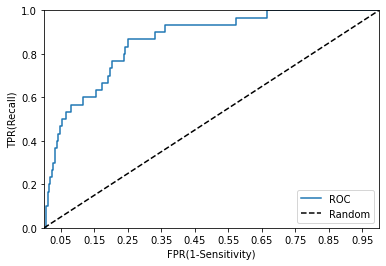

lda의 ROC AUC값: 0.8598


In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


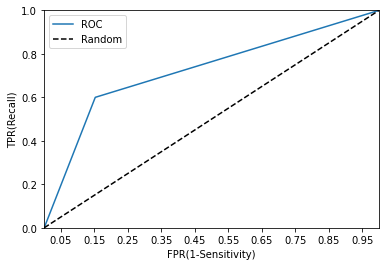

lda의 ROC AUC값: 0.7237


In [101]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

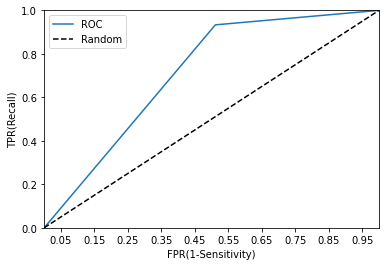

dt ROC AUC값: 0.7110


In [102]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


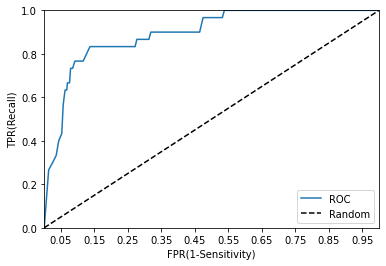

rf ROC AUC값: 0.8935


In [103]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

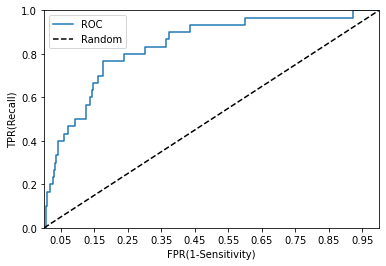

lr ROC AUC값: 0.8366


In [104]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


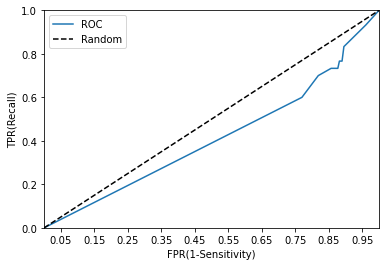

knn ROC AUC값: 0.4147


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [105]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))